In [52]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [53]:
df= pd.read_csv("Global internet users.csv")
df.head()

,Unnamed: 0,Entity,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
0,0,Afghanistan,AFG,1980,0.0,0.0,0,0.0
1,1,Afghanistan,AFG,1981,0.0,0.0,0,0.0
2,2,Afghanistan,AFG,1982,0.0,0.0,0,0.0
3,3,Afghanistan,AFG,1983,0.0,0.0,0,0.0
4,4,Afghanistan,AFG,1984,0.0,0.0,0,0.0


In [54]:
df['Entity'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Asia and Pacific', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Europe and Central Asia',
    

In [55]:
df.tail()

,Unnamed: 0,Entity,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
8862,8862,Zimbabwe,ZWE,2016,91.793457,23.119989,3341464,1.217633
8863,8863,Zimbabwe,ZWE,2017,98.985077,24.400000,3599269,1.315694
8864,8864,Zimbabwe,ZWE,2018,89.404869,25.000000,3763048,1.406322
8865,8865,Zimbabwe,ZWE,2019,90.102287,25.100000,3854006,1.395818
8866,8866,Zimbabwe,ZWE,2020,88.755806,29.299999,4591211,1.368916


In [56]:
df.shape

(8867, 8)

In [57]:
df.isna().sum()

Unnamed: 0                0
Entity                    0
Code                      0
Year                      0
Cellular Subscription     0
Internet Users(%)         0
No. of Internet Users     0
Broadband Subscription    0
dtype: int64

In [59]:
df=df.drop(['Unnamed: 0'], axis=1)

In [60]:
df.describe()

,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
count,8867.000000,8867.000000,8867.000000,8.867000e+03,8867.000000
mean,2000.151799,39.989614,17.043606,1.089138e+07,4.440695
std,11.812151,51.981410,26.883498,1.248841e+08,9.755705
min,1980.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,1990.000000,0.000000,0.000000,0.000000e+00,0.000000
50%,2000.000000,5.501357,0.855662,1.004700e+04,0.000000
75%,2010.000000,82.231594,25.449939,8.664195e+05,2.007603
max,2020.000000,436.103027,100.000000,4.699886e+09,78.524361


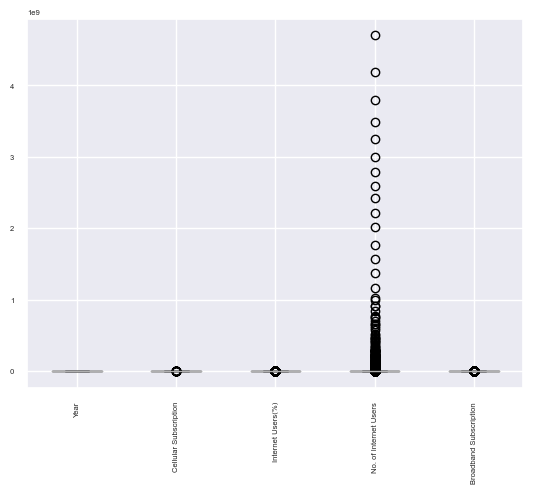

In [61]:
# finding outliers 

df.boxplot()
plt.xticks(rotation=90)
plt.show()


In [62]:
df

,Entity,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
0,Afghanistan,AFG,1980,0.000000,0.000000,0,0.000000
1,Afghanistan,AFG,1981,0.000000,0.000000,0,0.000000
2,Afghanistan,AFG,1982,0.000000,0.000000,0,0.000000
3,Afghanistan,AFG,1983,0.000000,0.000000,0,0.000000
4,Afghanistan,AFG,1984,0.000000,0.000000,0,0.000000
...,...,...,...,...,...,...,...
8862,Zimbabwe,ZWE,2016,91.793457,23.119989,3341464,1.217633
8863,Zimbabwe,ZWE,2017,98.985077,24.400000,3599269,1.315694
8864,Zimbabwe,ZWE,2018,89.404869,25.000000,3763048,1.406322
8865,Zimbabwe,ZWE,2019,90.102287,25.100000,3854006,1.395818


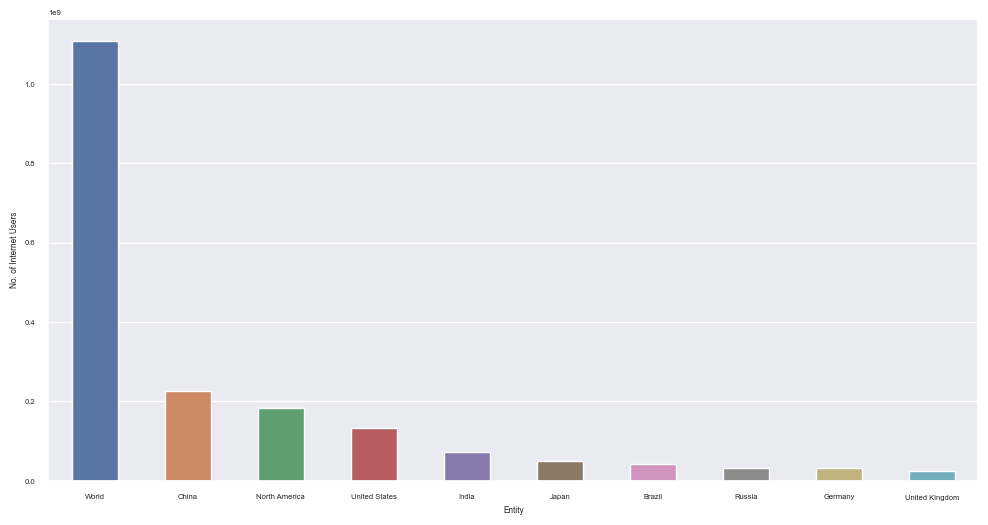

In [63]:
# Top 10 countries with highest average internet users 
plt.figure(figsize=(12, 6)) 
d = df.groupby('Entity')['No. of Internet Users'].mean().round().nlargest(10).reset_index()
sns.barplot(data=d, x = 'Entity', y = 'No. of Internet Users', width = 0.5 )
plt.show()

In [64]:
d = d.drop(d[(d['Entity']=='World')].index)
d = d.drop(d[(d['Entity']=='North America')].index)
d

,Entity,No. of Internet Users
1,China,226095158.0
3,United States,133425326.0
4,India,71766932.0
5,Japan,49804800.0
6,Brazil,42340844.0
7,Russia,33302832.0
8,Germany,31658207.0
9,United Kingdom,25731958.0


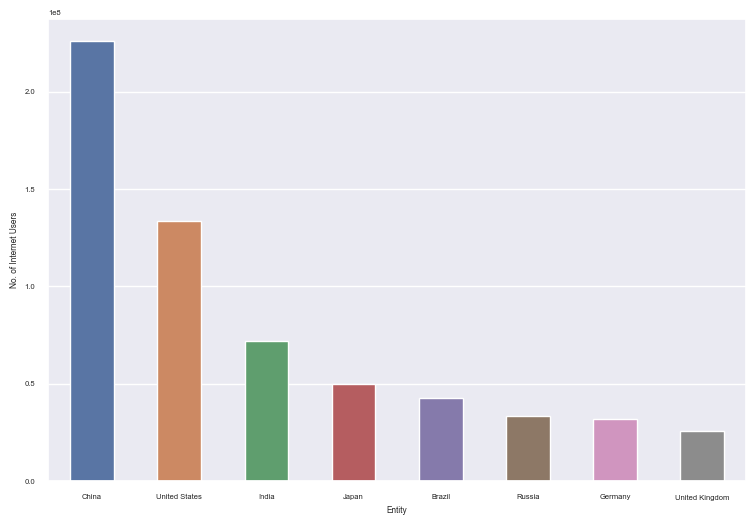

In [65]:
plt.figure(figsize=(9, 6)) 

sns.barplot(data=d, x = 'Entity', y = 'No. of Internet Users', width = 0.5 )
ax.bar_label(ax.containers[0])
plt.show()

# China has more number of internet users

# Lets check top 10 countries with highest internet users in 2020

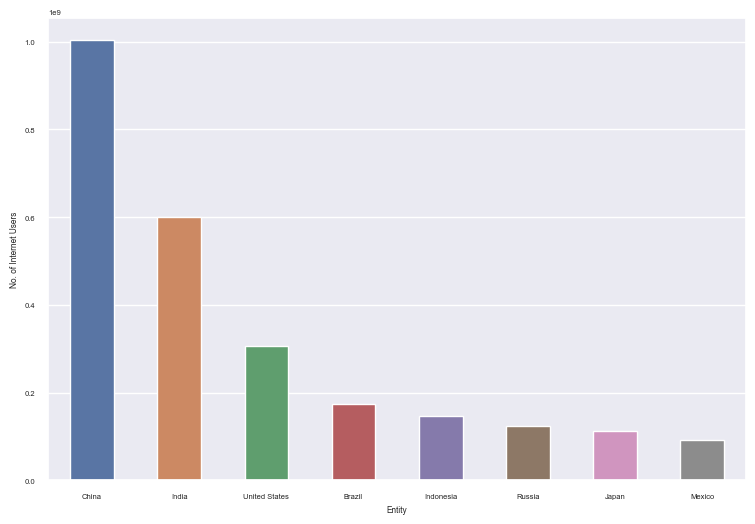

In [66]:
u = df[df['Year']==2020].groupby('Entity')['No. of Internet Users'].mean().round().nlargest(10).reset_index()
u = u.drop(u[(u['Entity']=='World')].index)
u = u.drop(u[(u['Entity']=='North America')].index)

plt.figure(figsize=(9, 6)) 
sns.barplot(data = u, x = 'Entity', y = 'No. of Internet Users', width = 0.5)
ax.bar_label(ax.containers[0])
plt.show()

# In 2020 China and India has more number of internet users

# Visualize China, India and United States Internet usage percentage

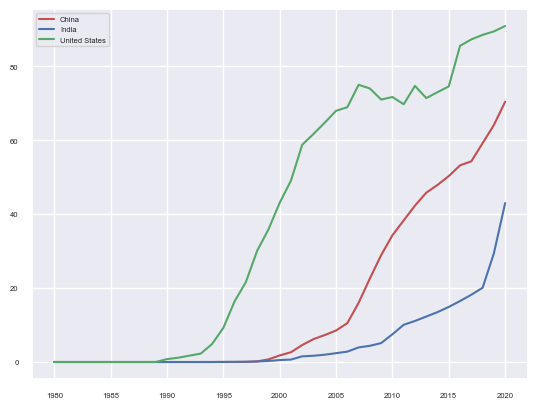

In [67]:
#firstly get X with China years and Y with China Internet Users (%)
x = df['Year'][df['Entity'] == 'China']
y = df['Internet Users(%)'][df['Entity'] == 'China']
plt.plot(x, y, color = 'r')
#get X with India years and Y with India Internet Users (%)
x = df['Year'][df['Entity'] == 'India']
y = df['Internet Users(%)'][df['Entity'] == 'India']
plt.plot(x, y, color = 'b')
#get X with United States years and Y with United States Internet Users (%)
x = df['Year'][df['Entity'] == 'United States']
y = df['Internet Users(%)'][df['Entity'] == 'United States']
plt.plot(x, y, color = 'g')
plt.legend(['China', 'India', 'United States'])
plt.show()


# Using Seaborn visualize dynamics of number of Internet users in Russia

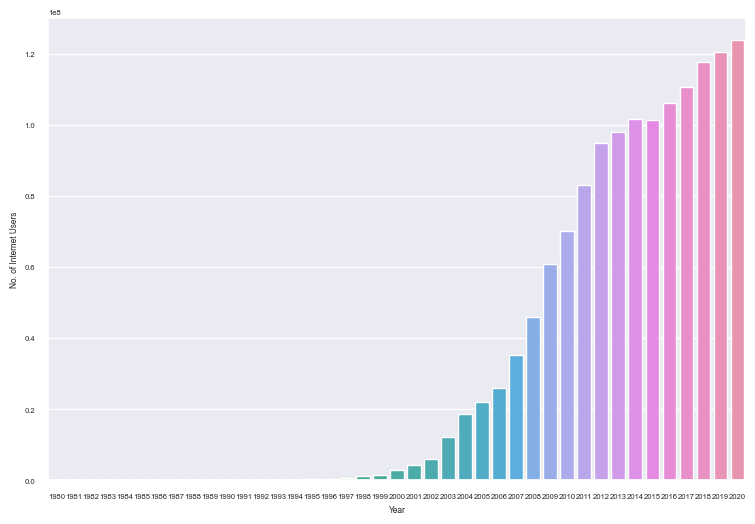

In [68]:
plt.figure(figsize=(9, 6)) 
sns.set(font_scale=.5)
sns.barplot(data = df, x = df['Year'][df['Entity']=='Russia'], y = df['No. of Internet Users'][df['Entity']=='Russia'])
plt.show()

# Dependence of the number of Internet users and the number of subscriptions per 100 people 

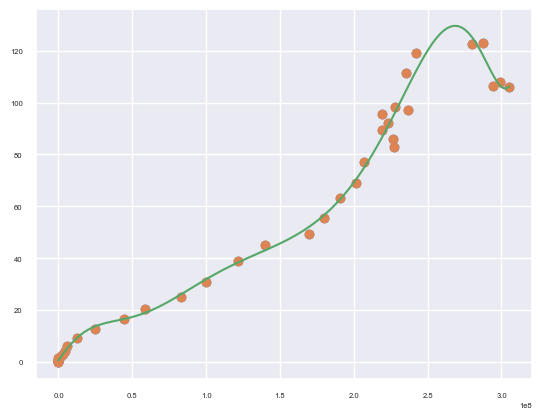

In [69]:
X = df['No. of Internet Users'][df['Entity'] == 'United States']
y = df['Cellular Subscription'][df['Entity'] == 'United States']
plt.scatter(X, y)
mymodel = np.poly1d(np.polyfit(X, y, 10))

myline = np.linspace(int(sorted(X)[0]), int(sorted(X)[-1]), int(sorted(y)[-1]))

plt.scatter(X, y)
plt.plot(myline, mymodel(myline), color = 'g')
plt.show()


In [70]:
# Mobile Phone Subscription Users per 100 people
fig = px.line(df,x='Year',y=['Cellular Subscription'],color='Entity',markers=True,title='Mobile phone subscriptions per 100 people 1980 to 2020')
fig.update_layout(
    hovermode='x unified',
    updatemenus=[
        dict(
            type = "buttons",
            direction = "left",
            buttons=list([
                dict(
                    args=[{"yaxis.type": "linear"}],
                    label="LINEAR",
                    method="relayout"
                ),
                dict(
                    args=[{"yaxis.type": "log"}],
                    label="LOG",
                    method="relayout"
                )
            ]),
        ),
    ]
)
fig.show()